In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)
tree_clf

DecisionTreeClassifier(max_depth=2)

In [7]:
from sklearn.tree import export_graphviz

In [8]:
export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True,
)

In [9]:
!ls iris_tree.dot

iris_tree.dot


In [10]:
!dot -Tpng iris_tree.dot -o iris_tree.png

In [11]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [12]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

DARK_READER = True
if DARK_READER:
    plt.rcParams.update({
        "lines.color": "white",
        "patch.edgecolor": "white",
        "text.color": "black",
        "axes.facecolor": "black",
        "axes.edgecolor": "lightgray",
        "axes.labelcolor": "white",
        "axes.titlecolor": "white",
        "xtick.color": "white",
        "ytick.color": "white",
        "grid.color": "lightgray",
        "figure.facecolor": "black",
        "figure.edgecolor": "black",
        "savefig.facecolor": "black",
        "savefig.edgecolor": "black",
    })

In [16]:
from pathlib import Path
from PIL import Image

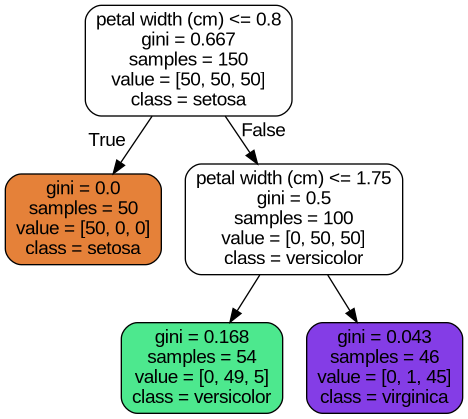

In [19]:
path_png = Path("iris_tree.png")
if path_png.exists():
    img_png = Image.open(path_png)
img_png

## Nodes and Attributes
It seems that each of the
`gini, samples, value, class` are accessible attributes of the nodes of the decision tree.

Let's try to access them. (cf. <https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html>)

In [5]:
def non_dunder_attr(sth):
    return [s for s in dir(sth) if not s.startswith("_")]

In [6]:
non_dunder_attr(tree_clf)

['apply',
 'ccp_alpha',
 'class_weight',
 'classes_',
 'cost_complexity_pruning_path',
 'criterion',
 'decision_path',
 'feature_importances_',
 'fit',
 'get_depth',
 'get_n_leaves',
 'get_params',
 'max_depth',
 'max_features',
 'max_features_',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'n_classes_',
 'n_features_',
 'n_features_in_',
 'n_outputs_',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'presort',
 'random_state',
 'score',
 'set_params',
 'splitter',
 'tree_']

In [20]:
tree_clf.tree_

In [21]:
non_dunder_attr(tree_clf.tree_)

['apply',
 'capacity',
 'children_left',
 'children_right',
 'compute_feature_importances',
 'compute_partial_dependence',
 'decision_path',
 'feature',
 'impurity',
 'max_depth',
 'max_n_classes',
 'n_classes',
 'n_features',
 'n_leaves',
 'n_node_samples',
 'n_outputs',
 'node_count',
 'predict',
 'threshold',
 'value',
 'weighted_n_node_samples']

In [25]:
tree_clf.tree_.node_count, tree_clf.tree_.n_leaves

(5, 3)

In [22]:
tree_clf.tree_.children_left

array([ 1, -1,  3, -1, -1])

In [23]:
tree_clf.tree_.children_right

array([ 2, -1,  4, -1, -1])

## Gini Impurity
The Gini impurity is defined as
$$
  G := 1 - \sum_{k=1}^{n} p_{k}^{2} \\
  \text{(subject to}\, \sum_{k=1}^{n} p_{k} = 1,\;
  p_{k} \ge 0 \;\;\forall\; k=1,2,\ldots,n \text{)}
$$

A few properties of $G$:

- $0 \le G \le 1$

## Estimating Class Probabilities

In [27]:
import numpy as np

In [26]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [28]:
np.array([[0, 49, 5]]) / 54

array([[0.        , 0.90740741, 0.09259259]])

In [29]:
tree_clf.predict([[5, 1.5]])

array([1])

## Gini Impurity or Entropy?

Cf. <https://sebastianraschka.com/faq/docs/decision-tree-binary.html>